In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL25zaXJtcGlsYXR6ZS9Db2RlL05JVS9hbmltYWxzLWluLW1vdGlvbi9ib29r'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/importlib/_bootstrap.py": 1734440048.843683, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/importlib/_bootstrap_external.py": 1734440048.8440545, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/zipimport.py": 1734440049.0075936, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/codecs.py": 1734440048.705189, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/encodings/aliases.py": 1734440048.7224822, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/encodings/__init__.py": 1734440048.7218487, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.12.7-macos-aarch64-none/lib/python3.12/encodings/utf_8.py": 1734440048.742286, "/Users/nsirmpilatze/.local/share/uv/python/cpython-3.1

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import colormaps

from movement import sample_data
from movement.filtering import filter_by_confidence, rolling_filter
from movement.kinematics import compute_speed
from movement.plots import plot_occupancy
from movement.roi import PolygonOfInterest
from movement.transforms import scale

SHA256 hash of downloaded file: ab9c9c95a3f8366583e2cdb9c84610c62bd0bb0c6cbbcbbdc6a3390b6108623f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
#| include: false

xr.set_options(
    display_expand_attrs=False,
    display_expand_coords=False,
    keep_attrs=True,
)

In [4]:
# Replace with the path to the unzipped Smart-Kages folder on your machine
smart_kages_path = Path.home() / ".movement" / "Smart-Kages"

# Let's visualise the contents of the folder
files = [f.name for f in smart_kages_path.iterdir()]
files.sort()
for file in files:
    print(file)

.DS_Store
kage14.nc
kage14_background.png
kage17.nc
kage17_background.png


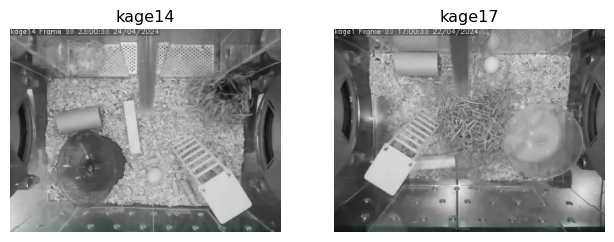

In [5]:
#| label: fig-background-frames
#| fig-cap: Top-down camera views of the Smart-Kage habitats
#| code-fold: true

kages = ["kage14", "kage17"]
img_paths = [smart_kages_path / f"{kage}_background.png" for kage in kages]
images = [plt.imread(img_path) for img_path in img_paths]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].set_title(f"{kages[i]}")
    axes[i].axis("off")

In [6]:
ds_kages = {}  # a dictionary to store kage name -> xarray dataset

for kage in ["kage14", "kage17"]:
    ds_kages[kage] = xr.open_dataset(smart_kages_path / f"{kage}.nc")

ds_kages["kage14"]   # Change to "kage17" to inspect the other dataset

<xarray.Dataset> Size: 1GB
Dimensions:          (time: 5236793, space: 2, keypoints: 8, individuals: 1)
Coordinates: (5)
Data variables:
    position         (time, space, keypoints, individuals) float64 670MB ...
    confidence       (time, keypoints, individuals) float64 335MB ...
Attributes: (7)

In [7]:
#| code-fold: true

start_times = {
    name: pd.Timestamp(ds.time.isel(time=0).values)
    for name, ds in ds_kages.items()
}
end_times = {
    name: pd.Timestamp(ds.time.isel(time=-1).values)
    for name, ds in ds_kages.items()
}

for name in start_times.keys():
    print(f"{name}: from {start_times[name]} to {end_times[name]}")

kage14: from 2024-04-08 13:55:40 to 2024-05-10 07:59:59.501205
kage17: from 2024-04-03 00:00:06 to 2024-05-10 07:59:59.509103


In [8]:
#| output: false

common_start = "2024-04-09 00:00:00"
common_end = "2024-05-07 00:00:00"

for kage in ["kage14", "kage17"]:
    ds_kages[kage] = ds_kages[kage].sel(time=slice(common_start, common_end))

In [9]:
#| code-fold: true
#| code-summary: "Expand to see how this can be done"

ds_14 = ds_kages["kage14"]

# Get the start datetime the experiment in kage14
experiment_start = ds_14.time.isel(time=0).data

# Subtract the start datetime from each timestamp
time_elapsed = (ds_14.time.data - np.datetime64(experiment_start))

# Convert to seconds
seconds_elapsed = time_elapsed / pd.Timedelta("1s")

# Assign the seconds_elapsed coordinate to the "time" dimension
ds_14 = ds_14.assign_coords(seconds_elapsed=("time", seconds_elapsed))

In [10]:
print(ds_14.coords["time"].values[:2])
print(ds_14.coords["seconds_elapsed"].values[:2])

['2024-04-09T00:00:06.000000000' '2024-04-09T00:00:06.500000000']
[0.  0.5]


In [11]:
#| output: false

ds_14.set_index(time="seconds_elapsed").sel(time=slice(0, 1800))

<xarray.Dataset> Size: 720kB
Dimensions:      (time: 3600, space: 2, keypoints: 8, individuals: 1)
Coordinates: (4)
Data variables:
    position     (time, space, keypoints, individuals) float64 461kB ...
    confidence   (time, keypoints, individuals) float64 230kB ...
Attributes: (7)

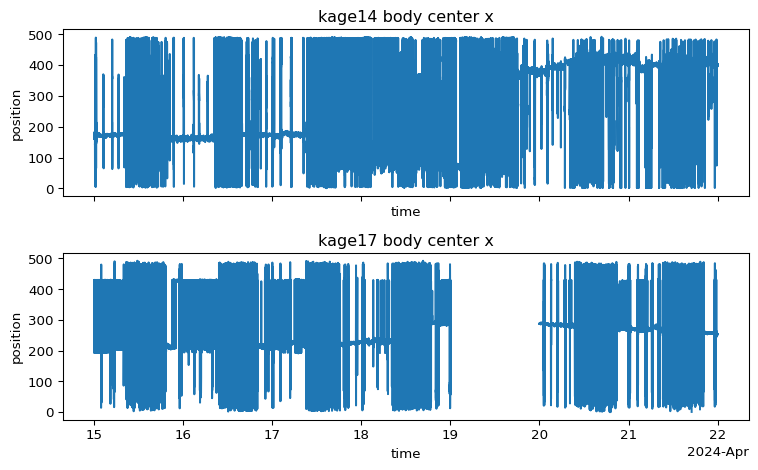

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)

for i, kage in enumerate(["kage14", "kage17"]):
    ds = ds_kages[kage].squeeze()  # remove redundant "individuals" dimension
    body_center = ds.position.sel(
        keypoints="bodycenter",
        time=slice("2024-04-15 00:00:00", "2024-04-21 23:59:59"),
        space="x"
    )
    body_center.plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body center x")

plt.tight_layout()
plt.show()

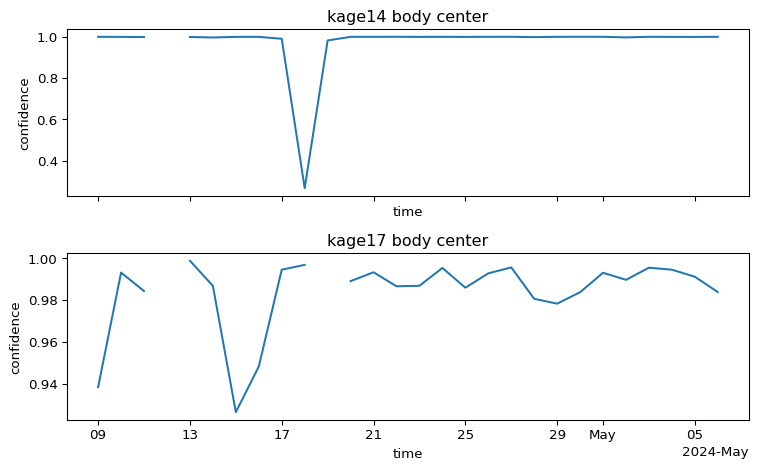

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)

for i, kage in enumerate(["kage14", "kage17"]):
    ds = ds_kages[kage].squeeze()
    ds_daily = ds.resample(time="1D").median()
    ds_daily.confidence.sel(keypoints="bodycenter").plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body center")

plt.tight_layout()
plt.show()

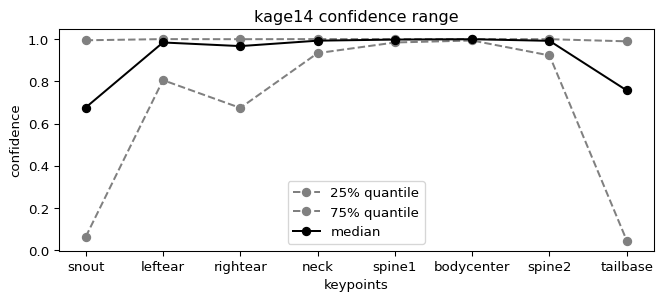

In [14]:
#| label: fig-confidence-range
#| fig-cap: Confidence range by keypoint
#| code-fold: true

kage = "kage14"
confidence = ds_kages[kage].confidence.squeeze()

fig, ax = plt.subplots(figsize=(8, 3))
confidence.quantile(q=0.25, dim="time").plot.line("o--", color="gray", ax=ax, label="25% quantile")
confidence.quantile(q=0.75, dim="time").plot.line("o--", color="gray", ax=ax, label="75% quantile")
confidence.median(dim="time").plot.line("o-", color="black", ax=ax, label="median")

ax.legend()
ax.set_title(f"{kage} confidence range")
plt.show()

In [15]:
reliable_keypoints = ["neck", "bodycenter", "spine1", "spine2"]

In [16]:
confidence_threshold = 0.95

for kage, ds in ds_kages.items():
    ds["position_filtered"] = filter_by_confidence(
        ds.position,
        ds.confidence,
        threshold=confidence_threshold,
    )

In [17]:
window_size = 3  # frames

for kage, ds in ds_kages.items():
    ds["position_smoothed"] = rolling_filter(
        ds.position_filtered,
        window_size,
        statistic="median",
    )

In [18]:
for kage, ds in ds_kages.items():
    ds["body_centroid"] = ds.position_filtered.sel(
        individuals="individual_0",  # the only individual in the dataset
        keypoints=reliable_keypoints
    ).mean(dim="keypoints")

In [19]:
PIXELS_PER_CM = 10

for kage, ds in ds_kages.items():
    # Scale from pixels to cm using a known conversion factor
    body_centroid_cm = scale(
        ds.body_centroid, factor=1 / PIXELS_PER_CM, space_unit="cm"
    )

    # Compute the speed in cm/sec
    ds["body_centroid_speed"] = compute_speed(
       body_centroid_cm.set_index(time="seconds_elapsed")  # switch time coords
    ).assign_coords(time=body_centroid_cm.time)            # restore datetime

ds_kages["kage14"].body_centroid_speed

<xarray.DataArray 'body_centroid_speed' (time: 4600675)> Size: 37MB
nan nan 0.05137 0.001921 0.02156 ... 0.01652 0.0186 0.02228 0.01102 0.03168
Coordinates: (2)

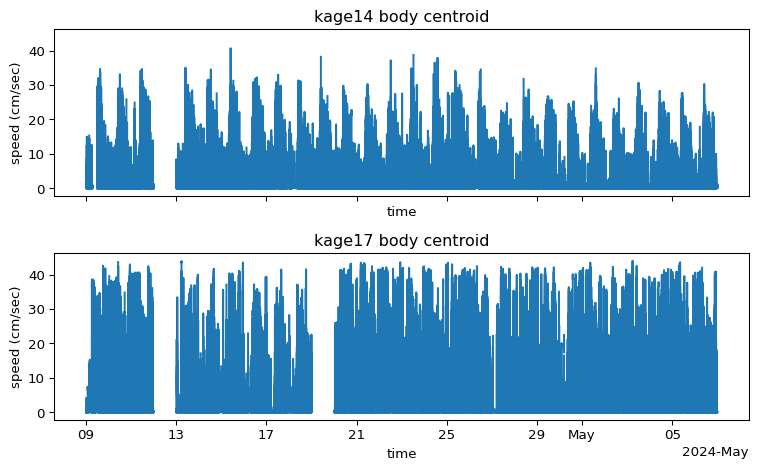

In [20]:
#| label: fig-body-speed
#| fig-cap: Body centroid speed

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 5), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    ds_kages[kage].body_centroid_speed.plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body centroid")
    axes[i].set_ylabel("speed (cm/sec)")

plt.tight_layout()
plt.show()

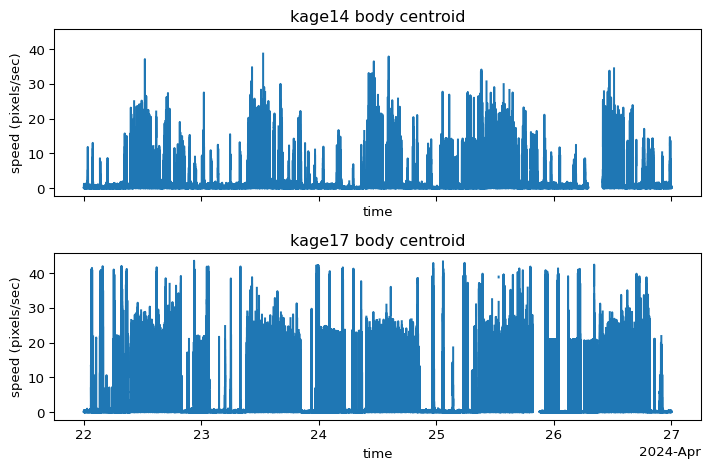

In [21]:
#| code-fold: true

time_window = slice("2024-04-22", "2024-04-26")

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(7.5, 5), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    speed = ds_kages[kage].body_centroid_speed.sel(time=time_window)
    speed.plot.line(ax=axes[i])
    axes[i].set_title(f"{kage} body centroid")
    axes[i].set_ylabel("speed (pixels/sec)")

plt.tight_layout()
plt.show()

In [22]:
for kage in ["kage14", "kage17"]:
    time_diff = ds_kages[kage].coords["seconds_elapsed"].diff(dim="time")
    ds_kages[kage]["distance"] = ds_kages[kage].body_centroid_speed * time_diff

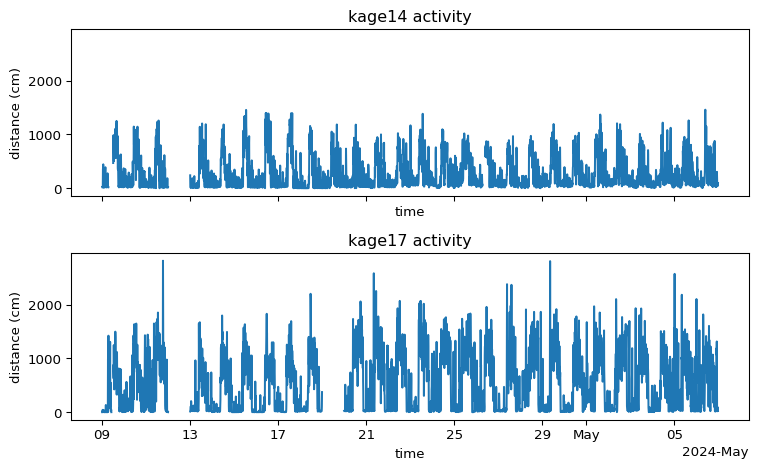

In [23]:
#| label: fig-activity-levels
#| fig-cap: Activity over time

time_bin_minutes = 10
time_bin_duration = pd.Timedelta(f"{time_bin_minutes}min")

fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 5), sharex=True, sharey=True
)

activity_dict = {}  # Dictionary to store the activity levels for each kage

for i, kage in enumerate(["kage14", "kage17"]):
    activity = ds_kages[kage].distance.resample(time=time_bin_duration).sum()
    activity.plot.line(ax=ax[i])
    ax[i].set_title(f"{kage} activity")
    ax[i].set_ylabel("distance (cm)")
    ax[i].set_xlabel("time")

    activity_dict[kage] = activity

plt.tight_layout()
plt.show()

In [24]:
# Define light cycle (in minutes since midnight)
lights_off = 9 * 60 + 30  # 9:30 AM in minutes
dawn = 20 * 60 + 30       # 8:30 PM in minutes  
lights_on = 21 * 60 + 30  # 9:30 PM in minutes

n_bins_in_day = int(24 * 60 / time_bin_minutes)

actogram_dict = {}  # Dictionary to store the 2D actogram for each kage

for i, kage in enumerate(["kage14", "kage17"]):
    activity = activity_dict[kage]
    days = list(activity.groupby("time.date").groups.keys())

    # Create an empty 2D actogram with dims (date, time_bin)
    actogram = xr.DataArray(
        np.zeros((len(days), n_bins_in_day)),
        dims=["date", "time_of_day"],
        coords={
            "date": days,
            "time_of_day": np.arange(
                time_bin_minutes/2, 24 * 60, time_bin_minutes
            )
        },
    )
    # Populate 2D actogram per day
    for date, day_activity in activity.groupby("time.date"):
        actogram.loc[dict(date=date)] = day_activity.values

    # Store the actogram in the dictionary for later use
    actogram_dict[kage] = actogram

actogram_dict["kage14"]  # Replace with kage17 to see the actogram for kage17

<xarray.DataArray (date: 28, time_of_day: 144)> Size: 32kB
21.94 12.34 15.7 40.82 51.96 359.7 337.1 ... 59.47 65.09 69.83 41.08 50.58 95.62
Coordinates: (2)

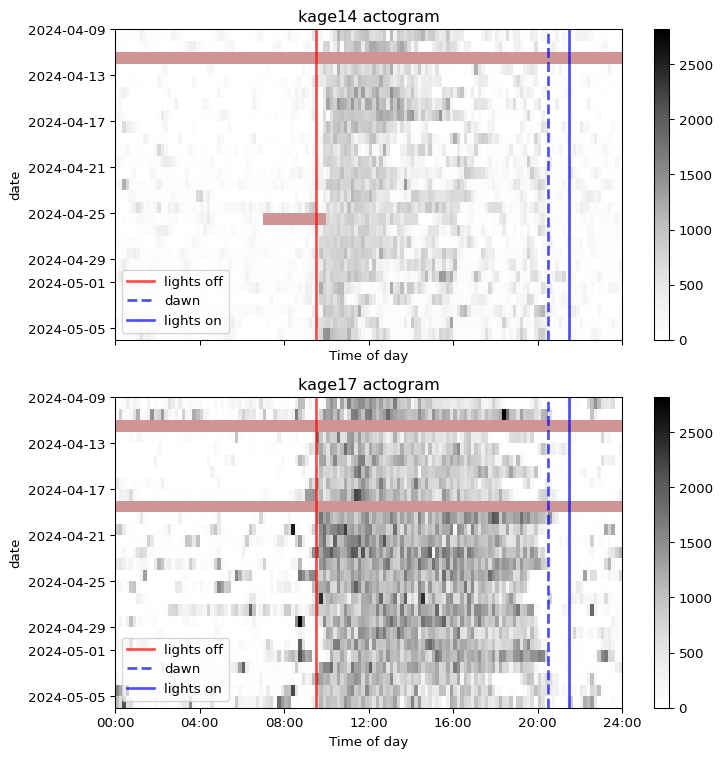

In [25]:
#| code-fold: true
#| label: fig-actograms
#| fig-cap: Actograms

max_activity = max(
    actogram_dict[kage].max().values for kage in ["kage14", "kage17"]
)

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 8), sharex=True, sharey=True,
)

for i, kage in enumerate(["kage14", "kage17"]):
    actogram = actogram_dict[kage]

    # Create a colormap for the actogram
    cmap = colormaps.get_cmap("Greys")
    cmap.set_bad(color="brown", alpha=0.5)  # Set bad values to red

    # Plot the actogram
    ax = axes[i]
    actogram.plot(
        ax=ax, yincrease=False, vmin=0, vmax=max_activity, cmap=cmap
    )

    # Assign x-tick labels every 4 hours formatted as HH:MM
    ax.set_xticks(np.arange(0, 24 * 60 + 1, 4 * 60))
    ax.set_xticklabels([f"{i:02d}:00" for i in np.arange(0, 25, 4)])

    # Mark light cycle
    ax.axvline(lights_off, color="red", alpha=0.7, lw=2, linestyle="-", label="lights off")
    ax.axvline(dawn, color="blue", alpha=0.7, lw=2, linestyle="--", label="dawn")
    ax.axvline(lights_on, color="blue", alpha=0.7, lw=2, linestyle="-", label="lights on")
    ax.legend(loc="lower left")

    # Set title and axis labels
    ax.set_title(f"{kage} actogram")
    ax.set_xlabel("Time of day")

plt.tight_layout()
plt.show()

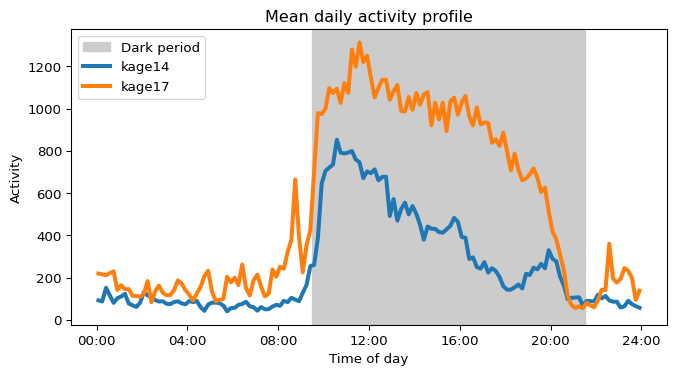

In [26]:
#| label: fig-mean-activity-profiles
#| fig-cap: Mean daily activity profiles

fig, ax = plt.subplots(figsize=(8, 4))

# Mark light cycle
ax.axvspan(lights_off, lights_on, color="0.8", label="Dark period")

for kage, actogram in actogram_dict.items():    
    actogram.mean(dim="date").plot.line(ax=ax, label=kage, lw=3)

ax.set_title(f"Mean daily activity profile")
ax.set_ylabel(f"Activity")
ax.set_xlabel("Time of day")

# Assign x-tick labels every 4 hours formatted as HH:MM
ax.set_xticks(np.arange(0, 24 * 60 + 1, 4 * 60))
ax.set_xticklabels([f"{i:02d}:00" for i in np.arange(0, 25, 4)])

ax.legend()
plt.show()

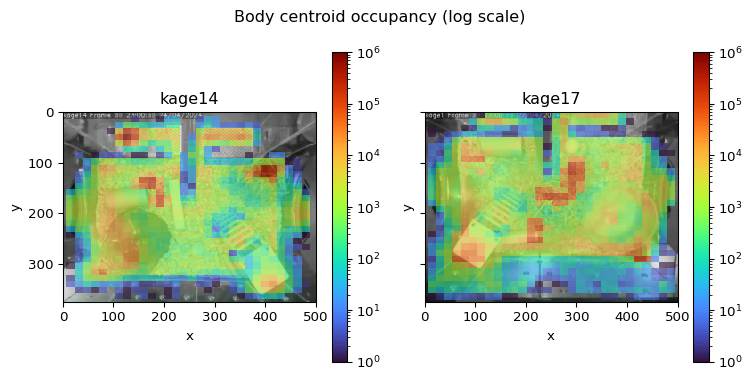

In [27]:
#| label: fig-occupancy1
#| fig-cap: Occupancy heatmaps

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True
)

plt.suptitle("Body centroid occupancy (log scale)")

for i, kage in enumerate(["kage14", "kage17"]):
    img = images[i]
    height, width = img.shape[:2]

    axes[i].imshow(img)
    plot_occupancy(
        # Setting the time coordinates to "elapsed time" is necessary
        # for the log scale to work properly.
        ds_kages[kage].body_centroid.set_index(time="seconds_elapsed"),
        ax=axes[i],
        cmap="turbo",
        norm="log",  # log scale the colormap
        vmax=10**6,
        alpha=0.6,   # some transparency
    )
    # Make axes match the image dimensions
    axes[i].set_ylim([height - 1, 0])
    axes[i].set_xlim([0, width])
    axes[i].set_title(kage)

plt.tight_layout()
plt.show()

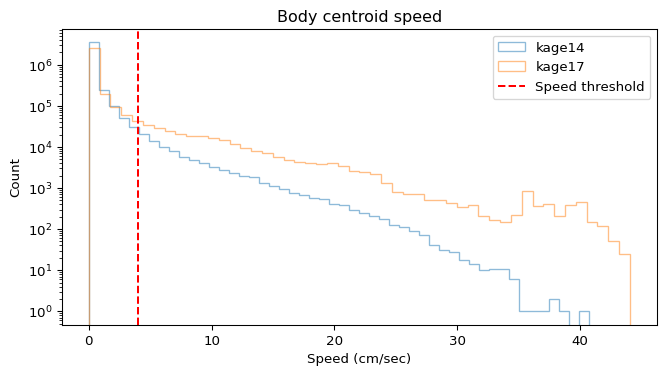

In [28]:
#| code-fold: true
#| label: fig-speed-histogram
#| fig-cap: Body centroid speed histogram (log scale)

fig, ax = plt.subplots(figsize=(8, 4))

speed_threshold = 4

for kage in ["kage14", "kage17"]:
    ds_kages[kage].body_centroid_speed.plot.hist(
        ax=ax, bins=50, alpha=0.5, label=kage, histtype="step",
    )

ax.axvline(speed_threshold, linestyle="--", color="red", label="Speed threshold")

ax.set_title("Body centroid speed")
ax.set_xlabel("Speed (cm/sec)")
ax.set_ylabel("Count")
ax.set_yscale("log")
ax.legend()
plt.show()

In [29]:
stationary_mask = ds_kages["kage14"].body_centroid_speed < 4
stationary_mask

<xarray.DataArray 'body_centroid_speed' (time: 4600675)> Size: 5MB
False False True True True True True True ... True True True True True True True
Coordinates: (2)

In [30]:
stationary_position = ds_kages["kage14"].body_centroid.where(stationary_mask)
stationary_position

<xarray.DataArray 'body_centroid' (time: 4600675, space: 2)> Size: 74MB
nan nan nan nan 198.7 177.6 198.7 ... 44.09 128.6 43.99 128.7 43.94 128.5 44.0
Coordinates: (3)
Attributes: (1)

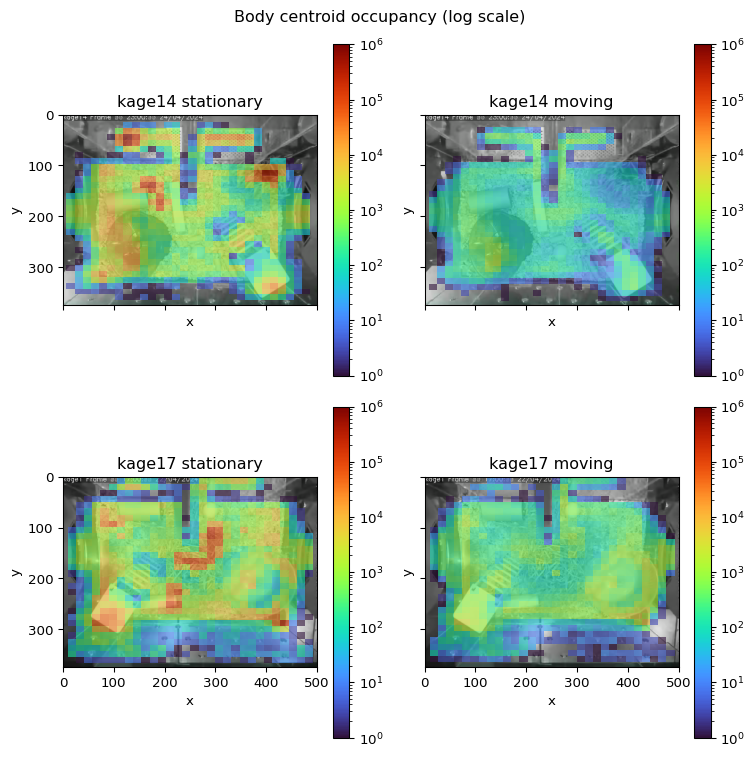

In [31]:
#| code-fold: true
#| label: fig-occupancy2
#| fig-cap: Occupancy heatmaps (stationary vs active)

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True
)

plt.suptitle("Body centroid occupancy (log scale)")

for i, kage in enumerate(["kage14", "kage17"]):
    img = images[i]
    height, width = img.shape[:2]

    masks = {
        "stationary": ds_kages[kage].body_centroid_speed < 4,
        "moving": ds_kages[kage].body_centroid_speed >= 4,
    }

    for j, (mask_name, mask) in enumerate(masks.items()):
        ax = axes[i, j]
        ax.imshow(img)
        plot_occupancy(
            ds_kages[kage].body_centroid.where(mask).set_index(time="seconds_elapsed"),
            ax=ax,
            cmap="turbo",
            norm="log",
            vmax=10**6,
            alpha=0.6,
        )
        ax.set_title(f"{kage} {mask_name}")
        ax.set_ylim([height - 1, 0])
        ax.set_xlim([0, width])

plt.tight_layout()
plt.show()

In [32]:
centres = {
    "kage14": np.array([145, 260]),  # (x, y)
    "kage17": np.array([385, 210]),
}
radius = 70

# Create a unit circle
n_points = 32
angles = np.linspace(0, 2 * np.pi, n_points)
unit_circle = np.column_stack([np.cos(angles), np.sin(angles)])

# Create ROIs by scaling and shifting the unit circle
rois = {}
for kage in ["kage14", "kage17"]:
    points = centres[kage] + radius * unit_circle
    roi = PolygonOfInterest(points, name=f"{kage} running wheel")
    rois[kage] = roi

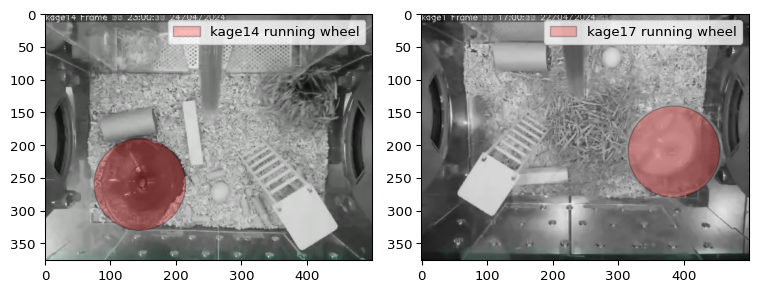

In [33]:
#| code-fold: true
#| label: fig-rois
#| fig-cap: Running wheel ROIs

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

for i, kage in enumerate(["kage14", "kage17"]):
    img = images[i]
    ax[i].imshow(img)
    rois[kage].plot(ax=ax[i], alpha=0.25, facecolor="red")
    ax[i].legend()

plt.tight_layout()
plt.show()

In [34]:
roi_occupancy = {
    kage: rois[kage].contains_point(ds_kages[kage].body_centroid)
    for kage in ["kage14", "kage17"]
}

roi_occupancy["kage14"]

<xarray.DataArray 'body_centroid' (time: 4600675)> Size: 5MB
False False False False False False ... False False False False False False
Coordinates: (2)
Attributes: (1)

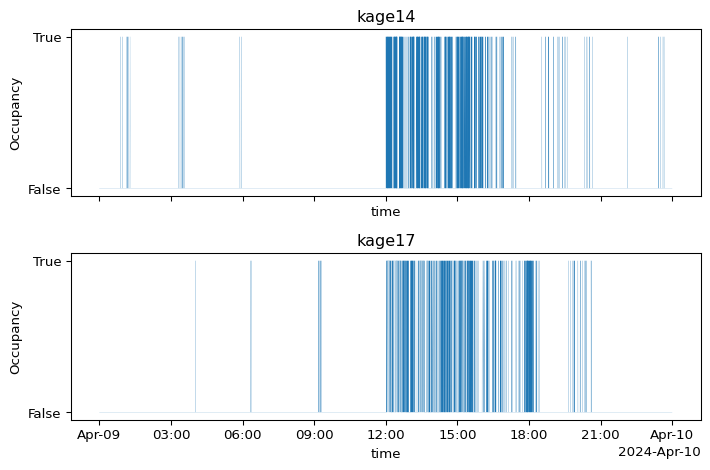

In [35]:
#| code-fold: true
#| label: fig-roi-occupancy-line
#| fig-cap: Running wheel occupancy during April 9, 2024

fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(7.5, 5), sharex=True, sharey=True
)

for i, kage in enumerate(["kage14", "kage17"]):
    ax = axes[i]
    roi_occupancy[kage].sel(time=slice(None, "2024-04-09 23:59:59")).plot.line(
        "-", ax=ax, lw=0.1
    )
    ax.set_title(kage)
    ax.set_ylabel("Occupancy")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["False", "True"])

plt.tight_layout()
plt.show()

In [36]:
for kage in ["kage14", "kage17"]:
    # Count the ratio of True values in the array
    on_wheel_ratio = roi_occupancy[kage].mean(dim="time").values
    # Convert to percentage
    pct_on_wheel = float(100 * on_wheel_ratio)
    print(f"{kage} spends {pct_on_wheel:.1f}% of its time on the running wheel")

kage14 spends 7.7% of its time on the running wheel
kage17 spends 5.6% of its time on the running wheel


In [37]:
#| code-fold: true

days = list(
    roi_occupancy["kage14"].dropna(dim="time").groupby("time.date").groups.keys()
)
n_days = len(days)

# Create a new DataArray of NaNs with shape (kage, date, period)
daily_occupancy = xr.DataArray(
    np.full((2, n_days, 2), np.nan),
    dims=["kage", "date", "period"],
    coords={
        "kage": ["kage14", "kage17"],
        "date": days,
        "period": ["dark", "light"]
    },
)

for kage in ["kage14", "kage17"]:
    for date, day_ds in roi_occupancy[kage].dropna(dim="time").groupby("time.date"):
        dark_period = slice(f"{date} 09:30:00", f"{date} 21:30:00")
        light_period1 = slice(f"{date} 00:00:00", f"{date} 09:30:00")
        light_period2 = slice(f"{date} 21:30:00", f"{date} 23:59:59")

        dark_occupancy = 100 * day_ds.sel(time=dark_period).mean()
        light_occupancy = 100 * (
            day_ds.sel(time=light_period1).mean() +
            day_ds.sel(time=light_period2).mean()
        )

        daily_occupancy.loc[dict(kage=kage, date=date, period="dark")] = dark_occupancy
        daily_occupancy.loc[dict(kage=kage, date=date, period="light")] = light_occupancy

In [38]:
daily_occupancy

<xarray.DataArray (kage: 2, date: 27, period: 2)> Size: 864B
18.14 0.5802 14.61 0.2946 15.77 0.05681 ... 7.642 1.184 6.061 1.822 5.416 1.465
Coordinates: (3)

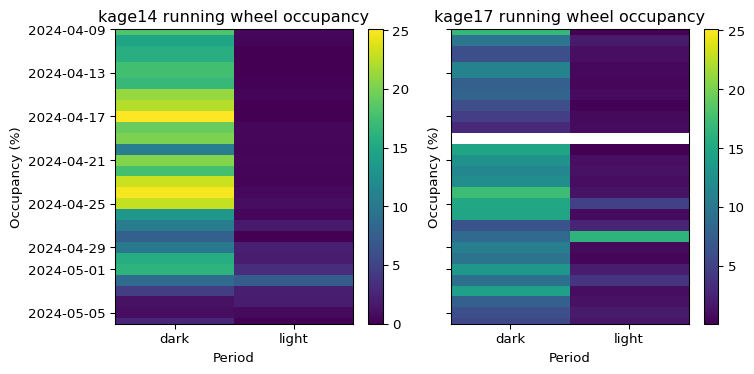

In [39]:
#| code-fold: true
#| label: fig-roi-occupancy
#| fig-cap: Running wheel occupancy during light and dark periods

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

max_occupancy = daily_occupancy.max()

for i, kage in enumerate(["kage14", "kage17"]):
    daily_occupancy.sel(kage=kage).plot(
        ax=axes[i], lw=3, vmax=daily_occupancy.max(), yincrease=False
    )

    axes[i].set_title(f"{kage} running wheel occupancy")
    axes[i].set_xticks([0.25, 0.75])
    axes[i].set_ylabel("Occupancy (%)")
    axes[i].set_xlabel("Period")

plt.tight_layout()
plt.show()